In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import svm
import matplotlib.cm as cm
%matplotlib inline

In [45]:
ex1 = loadmat('../Coursera/ML_NG/machine-learning-ex6/ex6/ex6data1.mat')
X_ex1 = ex1['X']
y_ex1 = ex1['y']

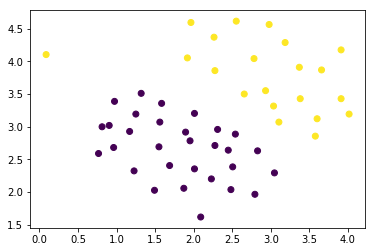

In [46]:
plt.figure(figsize=(6, 4))
_ = plt.scatter(X_ex1[:, 0], X_ex1[:, 1], c=y_ex1)

Define a method to draw decision boundaries on a 2D dataset

In [5]:
from matplotlib.colors import ListedColormap
cmap1 = ListedColormap(['#aaffff', '#aa0000'])

def plot_2D_decision_boundary(data, target, classifier, ax=None):
    '''Plots a decision boundary for a 2 dimensional dataset
    for a fitted model "classifier"'''
    
    #Get the min, max values for the features 0 and 1
    X_min, X_max = data[:, 0].min(), data[:, 0].max()
    Y_min, Y_max = data[:, 1].min(), data[:, 1].max()
    xx = np.linspace(X_min, X_max, 1000)
    yy = np.linspace(Y_min, Y_max, 1000)
    
    XX, YY = np.meshgrid(xx, yy)
    grid = np.c_[XX.ravel(), YY.ravel()]
    
    #Predict the values for this meshgrid
    values = classifier.predict(grid)
    
    if not ax:
        fig = plt.figure(figsize=(6, 8))
        ax = plt.gca()
        _ = plt.scatter(data[:, 0], data[:, 1], c=target)
    #Let's plot it
    ax.imshow(values.reshape(XX.shape),  extent=(X_min, X_max, Y_min, Y_max), aspect='auto', origin='lower', cmap=cmap1)
    
    ax.set_xlim(X_min, X_max)
    ax.set_ylim(Y_min, Y_max)
    

/Users/harshit/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


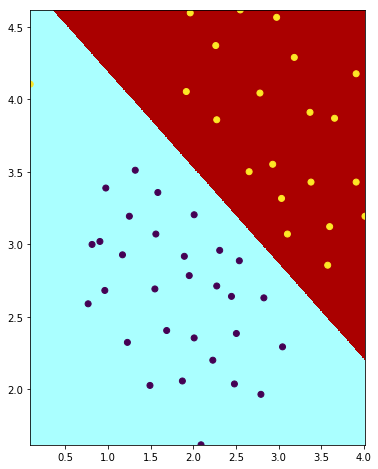

In [6]:
linear_svc = svm.SVC(C=1, kernel='linear')
linear_svc.fit(X_ex1, y_ex1)
plot_2D_decision_boundary(data=X_ex1, target=y_ex1,classifier=linear_svc)

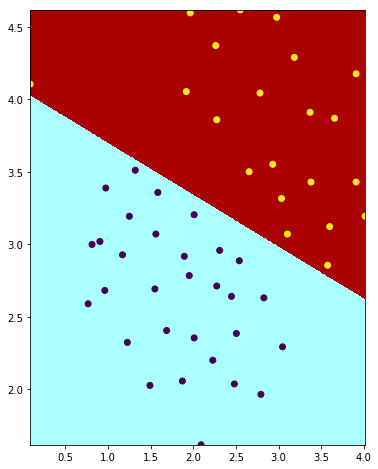

In [7]:
linear_svc_100 = svm.SVC(C=100, kernel='linear')
linear_svc_100.fit(X_ex1, y_ex1)
plot_2D_decision_boundary(data=X_ex1, target=y_ex1,classifier=linear_svc_100)

SVM with a non linear kernel 'Gaussian'

In [8]:
#Load another dataset

ex2 = loadmat('../Coursera/ML_NG/machine-learning-ex6/ex6/ex6data2.mat')
X_ex2 = ex2['X']
y_ex2 = ex2['y']

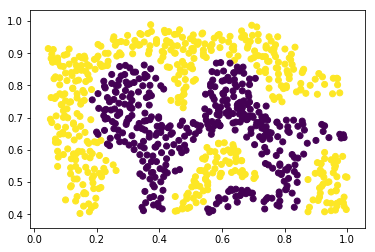

In [9]:
plt.figure(figsize=(6, 4))
_ = plt.scatter(X_ex2[:, 0], X_ex2[:, 1], c=y_ex2)

#Let's try the Gaussian Kernal trick

In [10]:
non_linear_svm = svm.SVC(kernel='rbf', C=1, gamma=100)
non_linear_svm.fit(X_ex2, y_ex2)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

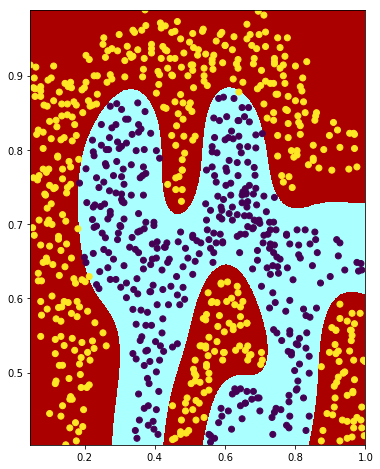

In [11]:
plot_2D_decision_boundary(classifier=non_linear_svm, data=X_ex2, target=y_ex2)

In [12]:
ex3 = loadmat('../Coursera/ML_NG/machine-learning-ex6/ex6/ex6data3.mat')
X_ex3 =ex3['X']
y_ex3 = ex3['y']
Xval = ex3['Xval']
yval = ex3['yval']

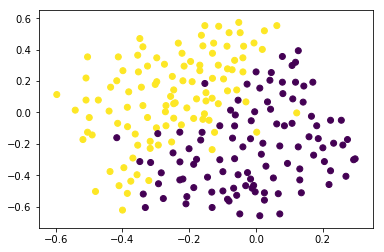

In [13]:
plt.figure(figsize=(6, 4))
_ = plt.scatter(X_ex3[:, 0], X_ex3[:, 1], c=y_ex3)

Our task is to select best combination of regularization parameter C and Gamma 

In [26]:
list1 = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
list2 = [(list1[i],list1[j]) for i in range(len(list1)) for j in range(len(list1))]

In [27]:
idx = np.argmax(np.array([svm.SVC(kernel='rbf', C=C, gamma=gamma).fit(X_ex3, y_ex3).score(Xval, yval) for C, gamma in list2]))
bestc, bestgamma = list2[idx]

In [57]:
svm2 = svm.SVC(kernel='rbf', C=bestc, gamma=bestgamma)
svm2.fit(X_ex3, y_ex3)
score = svm2.score(Xval, yval)
score

0.96499999999999997

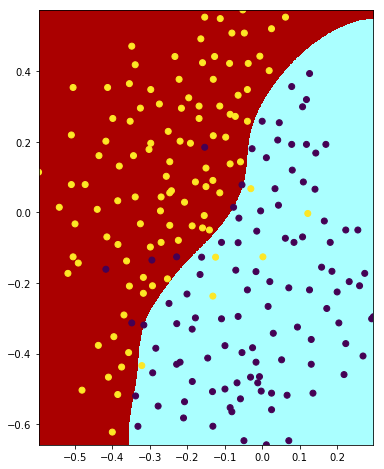

In [32]:
plot_2D_decision_boundary(classifier=svm2, data=X_ex3, target=y_ex3)

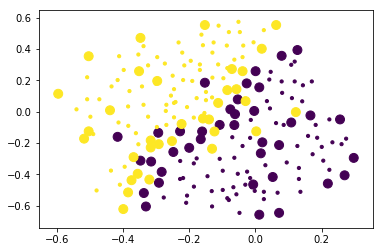

In [59]:
#Plotting support vectors

plt.figure(figsize=(6, 4))
_ = plt.scatter(X_ex3[svm2.support_, 0], X_ex3[svm2.support_, 1], c=y_ex3[svm2.support_], s=80)
_ = plt.scatter(X_ex3[:, 0], X_ex3[:, 1], c=y_ex3, s=10)